In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
!pip install certifi chardet click easydict h5py~=2.7 intel-openmp imgaug ipython ipython-genutils matplotlib==3.0.3 moviepy numpy==1.16.4 opencv-python~=3.4 pandas patsy 
!pip install python-dateutil pyyaml>=5.1 requests ruamel.yaml~=0.15 setuptools scikit-image scikit-learn scipy six statsmodels tables tensorpack>=0.9.7.1 tqdm wheel
%tensorflow_version 1.x
import numpy as np
import time
import sys
import os
import importlib

from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

from google.colab import output
def alert_done():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/b/bd/Bienenkorbglocke.1133.Hz.ogg").play()')

os.environ["DLClight"]="True"
%cd drive/My\ Drive/Development/DeepLabCut
import deeplabcut
from deadROMM import possumPolish

alert_done()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 13.0MB 237kB/s 
     |████████████████████████████████| 17.3MB 201kB/s 
     |████████████████████████████████| 43.3MB 69kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotl

TensorFlow 1.x selected.
/content/drive/My Drive/Development/DeepLabCut
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
root = '/content/drive/My Drive/Development/DeepLabCut'

importlib.reload(possumPolish)
model = possumPolish.Project()

# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/demo_blank_dv92_biceps_3pec_delt/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv101right', './dev/possum101right_biceps_triceps-Phil-2020-06-08/config.yaml') #101R
config_path = model.load('./deadROMM/profiles-colab.yaml','dv101left', './dev/possum101_11Apr-Phil-2020-04-13-diff/config.yaml') #101L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/dv92_biceps_3pec_delt-Phil-2020-06-09/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85left', './dev/dv85_left_biceps_teres_lat-Phil-2020-06-09/config.yaml') #85L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85right', './dev/dv85_right_triceps_lat-Phil-2020-06-09/config.yaml') #85R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88left', './dev/dv88_left_teresmaj_pec-Phil-2020-06-09/config.yaml') #88L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88right', './dev/dv88_trilong_pec-Phil-2020-06-09/config.yaml') #88R
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm105', './dev/sm105-Phil-2020-06-09/config.yaml') #105
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm108', './dev/sm108-Phil-2020-06-09/config.yaml') #108
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm126', './dev/sm126-Phil-2020-06-09/config.yaml') #126

# model.importXma(next(iter(model.config['history'].keys())))  #e.g. './dev/dv92_biceps...' no quotes
# model.dlc.create_training_dataset(model.yaml)

alert_done()

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:168: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  profiles = ruamel.yaml.load(open(self.profile_path))


Loaded profile dv101left
Generated absolute paths to project directories
Successfully loaded profile dv101left


Increment iteration and retrain

In [ ]:
trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
# cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=4
# cfg_dlc['hist_eq']=True
# cfg_dlc['gamma']=False
# cfg_dlc['logcontrast']=False
# cfg_dlc['allchannelsclahe']=True
cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
# cfg_dlc['global_scale']=1.0
cfg_dlc['scale_jitter_lo'] = 1.0
cfg_dlc['scale_jitter_up'] = 1.0
cfg_dlc['global_scale'] = 1.0


# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot

model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)
model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Starting with imgaug pose-dataset loader.
Batch Size is 4
Initializing ResNet
Loading ImageNet-pretrained resnet_50
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Max_iters overwritten as 300000
Display_iters overwritten as 50
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 1.0, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervisio

iteration: 50 loss: 0.2071 lr: 0.005
iteration: 100 loss: 0.0360 lr: 0.005
iteration: 150 loss: 0.0347 lr: 0.005
iteration: 200 loss: 0.0343 lr: 0.005
iteration: 250 loss: 0.0341 lr: 0.005
iteration: 300 loss: 0.0352 lr: 0.005
iteration: 350 loss: 0.0318 lr: 0.005
iteration: 400 loss: 0.0325 lr: 0.005
iteration: 450 loss: 0.0312 lr: 0.005
iteration: 500 loss: 0.0321 lr: 0.005
iteration: 550 loss: 0.0313 lr: 0.005
iteration: 600 loss: 0.0314 lr: 0.005
iteration: 650 loss: 0.0319 lr: 0.005
iteration: 700 loss: 0.0306 lr: 0.005
iteration: 750 loss: 0.0280 lr: 0.005
iteration: 800 loss: 0.0294 lr: 0.005
iteration: 850 loss: 0.0289 lr: 0.005
iteration: 900 loss: 0.0276 lr: 0.005
iteration: 950 loss: 0.0279 lr: 0.005
iteration: 1000 loss: 0.0272 lr: 0.005
iteration: 1050 loss: 0.0264 lr: 0.005
iteration: 1100 loss: 0.0252 lr: 0.005
iteration: 1150 loss: 0.0256 lr: 0.005
iteration: 1200 loss: 0.0239 lr: 0.005
iteration: 1250 loss: 0.0238 lr: 0.005
iteration: 1300 loss: 0.0240 lr: 0.005
iterat

## Round 2: Import outliers and retrain

In [ ]:
# model.importXma('31Jul20_16h08m34s','./dev/possum101_11Apr-Phil-2020-04-13-diff/xma/outliers1.csv',outlier_mode=True)
# model.dlc.check_labels(model.yaml)

trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
# cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=4
# cfg_dlc['hist_eq']=True
# cfg_dlc['gamma']=False
# cfg_dlc['logcontrast']=False
# cfg_dlc['allchannelsclahe']=True
cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
# cfg_dlc['global_scale']=1.0
cfg_dlc['scale_jitter_lo'] = 1.0
cfg_dlc['scale_jitter_up'] = 1.0
cfg_dlc['global_scale'] = 1.0


# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot

model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)


model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Starting with imgaug pose-dataset loader.
Batch Size is 4
Initializing ResNet
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Loading ImageNet-pretrained resnet_50

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Max_iters overwritten as 300000
Display_iters overwritten as 50
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-4/possum101_11AprApr13-trainset95shuffle1/train/snapshot', 'log_dir

iteration: 50 loss: 0.1876 lr: 0.005
iteration: 100 loss: 0.0265 lr: 0.005
iteration: 150 loss: 0.0276 lr: 0.005
iteration: 200 loss: 0.0267 lr: 0.005
iteration: 250 loss: 0.0285 lr: 0.005
iteration: 300 loss: 0.0274 lr: 0.005
iteration: 350 loss: 0.0267 lr: 0.005
iteration: 400 loss: 0.0248 lr: 0.005
iteration: 450 loss: 0.0263 lr: 0.005
iteration: 500 loss: 0.0260 lr: 0.005
iteration: 550 loss: 0.0233 lr: 0.005
iteration: 600 loss: 0.0222 lr: 0.005
iteration: 650 loss: 0.0245 lr: 0.005
iteration: 700 loss: 0.0262 lr: 0.005
iteration: 750 loss: 0.0250 lr: 0.005
iteration: 800 loss: 0.0229 lr: 0.005
iteration: 850 loss: 0.0226 lr: 0.005
iteration: 900 loss: 0.0229 lr: 0.005
iteration: 950 loss: 0.0249 lr: 0.005
iteration: 1000 loss: 0.0231 lr: 0.005
iteration: 1050 loss: 0.0205 lr: 0.005
iteration: 1100 loss: 0.0231 lr: 0.005
iteration: 1150 loss: 0.0233 lr: 0.005
iteration: 1200 loss: 0.0234 lr: 0.005
iteration: 1250 loss: 0.0220 lr: 0.005
iteration: 1300 loss: 0.0216 lr: 0.005
iterat

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-df25ed38d10b>", line 27, in <module>
    model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/training.py", line 134, in train_network
    raise e
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/training.py", line 132, in train_network
    train(str(poseconfigfile),displayiters,saveiters,maxiters,max_to_keep=max_snapshots_to_keep,keepdeconvweights=keepdeconvweights,allow_growth=allow_growth) #pass on path and file name for pose_cfg.yaml!
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/train.py", line 190, in train
 

KeyboardInterrupt: ignored

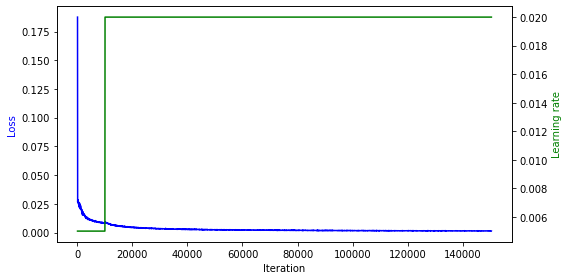

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/  already exists!
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1  already exists!
Running  DLC_resnet50_possum101_11AprApr13shuffle1_150000  with # of trainingiterations: 150000
This net has already been evaluated!



  0%|          | 0/75 [00:00<?, ?it/s]

Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000  already exists!



100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:261: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Function <function evaluate_network at 0x7f7486e09400> created 0 new files in directory ./dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Updated config.yaml with event evaluation at 05Aug20_15h08m06s
Using snapshot-150000 for model /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-4/possum101_11AprApr13-trainset95shuffle1
Initializing ResNet
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-4/possum101_11AprApr13-trainset95shuffle1/train/snapshot-150000



  0%|          | 0/7904 [00:00<?, ?it/s]

Starting to analyze %  ./videos/11Apr_diff.mp4
Loading  ./videos/11Apr_diff.mp4
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904  found with (before cropping) frame dimensions:  1024 1024
Starting to extract posture



100%|█████████▉| 7900/7904 [05:52<00:00, 22.36it/s]
7979it [05:56, 22.38it/s]

Detected frames:  7904
Saving results in videos...
Saving csv poses!


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
Function <function analyze_videos at 0x7f7486e096a8> created 3 new files in directory ./videos
Updated config.yaml with event analysis at 05Aug20_15h09m24s


In [ ]:
model.evaluateAndAnalyze()
# model.getOutliers(20, outlier_algo='jump') 
alert_done()

In [ ]:
model.dlc.check_labels(model.yaml)
alert_done()

Creating images with labels by Phil.
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [ ]:
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'])

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.


  0%|          | 13/7904 [00:00<01:05, 120.12it/s]

7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:13<00:00, 59.14it/s]


In [ ]:

model.dlc.filterpredictions(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'], filtertype="spline",windowlength=17)
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'],filtered=True)


4it [00:00, 39.50it/s]

Filtering with spline model /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4


44it [00:01, 38.13it/s]


Saving filtered csv poses!


  0%|          | 0/7904 [00:00<?, ?it/s]

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.
7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:16<00:00, 57.86it/s]


In [ ]:
model.dlc.create_training_dataset(model.yaml,windows2linux=True)

/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/training-datasets/iteration-3/UnaugmentedDataSet_possum101_11AprApr13  already exists!
Annotation data converted to unix format...
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/train  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([57, 62, 69, 32, 70,  1, 35, 29,  6, 66, 48, 79, 22, 44, 40, 36, 21,
           7, 10,  5, 43, 63,  8, 31, 55, 38, 33, 65, 41,  2, 73, 50, 24, 77,
          52, 53, 16, 64, 78, 67, 30, 72,  9, 71, 47, 75, 59, 23, 37, 19, 15,
          25, 76, 58, 20, 42, 14, 68, 74, 39, 49, 12, 56,  0, 46,  4, 27, 60,
          26, 34, 13, 54, 51, 45, 11, 28]), array([ 3, 17, 18, 61])))]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May 25 22:14:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    34W / 250W |  15767MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  